In [1]:
with open('tsoi.txt', 'r') as ftr:
    tsoi = ftr.read().replace('\n', ' ')

In [2]:
with open('meladze.txt', 'r') as ftr:
    meladze = ftr.read().replace('\n', ' ')

In [3]:
with open('bobr.txt', 'r') as ftr:
    bobr = ftr.read().replace('\n', ' ')

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('russian') + stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
clean_bobr = remove_stopwords(bobr)
clean_meladze = remove_stopwords(meladze)
clean_tsoi = remove_stopwords(tsoi)
print(clean_bobr)

Сидим бобром столом Вдвоём , ужин готовим полено Давай поговорим , бобёр , , наболело Скажи , нами плотина , Скажи , нами обрыв ? обниму твоё пушистое тело почему бобры добры ? Сидим бобром столом , , текила , ром , точим полено Скажи честно , бобёр , Почему , бобёр , офигенно ? Идём бобром лесу руках несу , болтает хвост весу Идём вдвоём поём бобром хиты Алсу Пришли дому бобра , дал собой добра четыре ведра произнёс бобёр : `` всё давай , попёр . ''


In [7]:
!pip install nltk spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 69.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import string
import spacy
nlp = spacy.load("ru_core_news_sm")

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    for token in tokens:
        doc = nlp(token)
        lemmatized_token = doc[0].lemma_
        if lemmatized_token not in stop_words:
            lemmatized_tokens.append(lemmatized_token)

    return " ".join(lemmatized_tokens)

In [9]:
songs = [clean_bobr, clean_meladze, clean_tsoi]
cleaned_songs = [preprocess_text(song) for song in songs]
print(cleaned_songs)

['сидеть бобёр стол вдвоём ужин готовить полено давать поговорить бобёр наболело сказать нами плотина сказать нами обрыв обниму твоё пушистый тело почему бобёр добры сидеть бобёр стол текила ром точим полено сказать честно бобёр почему бобёр офигенно идём бобёр лес рука несу болтать хвост вес идём вдвоём поём бобёр хит алсу прийти дом бобёр дать добра четыре ведро произнёс бобёр всё давать попёр', 'друг друг наш лодка плавать верху дно жизнь параллельных спорить одном всё знать больший энциклопедия энциклопедия объясни хотеть это второй выбирать — попадать выбирать её — пропадать параллельные параллельные достать уходить неё выпить чаю выходить замечать параллельные параллельные достать сомневаться план сбудутся яву жизнях параллельно типо жить всё знать больший энциклопедия энциклопедия объясни это второя уау выбирать — попадать выбирать её — пропадать параллельные параллельные достать уходить неё выпить чаю выходить замечать параллельные параллельные достать байбабабабабабай байбабаб

TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import pandas as pd
import time

In [15]:
start_time = time.time()

tfIdfVectorizer=TfidfVectorizer(use_idf=True)

tfIdf = tfIdfVectorizer.fit_transform(cleaned_songs)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

end_time = time.time()
print(f"TF-IDF time: {end_time - start_time} seconds")  # время работы метода TF-IDF

TF-IDF time: 0.007621049880981445 seconds


In [35]:
df.head(15)

,TF-IDF
бобёр,0.758676
сказать,0.227603
почему,0.151735
нами,0.151735
идём,0.151735
вдвоём,0.151735
сидеть,0.151735
давать,0.151735
стол,0.151735
полено,0.151735


In [13]:
df.tail(15)

,TF-IDF
догнать,0.0
план,0.0
плавать,0.0
перестать,0.0
пасёт,0.0
пастух,0.0
параллельных,0.0
параллельные,0.0
параллельно,0.0
байбабабабабабай,0.0


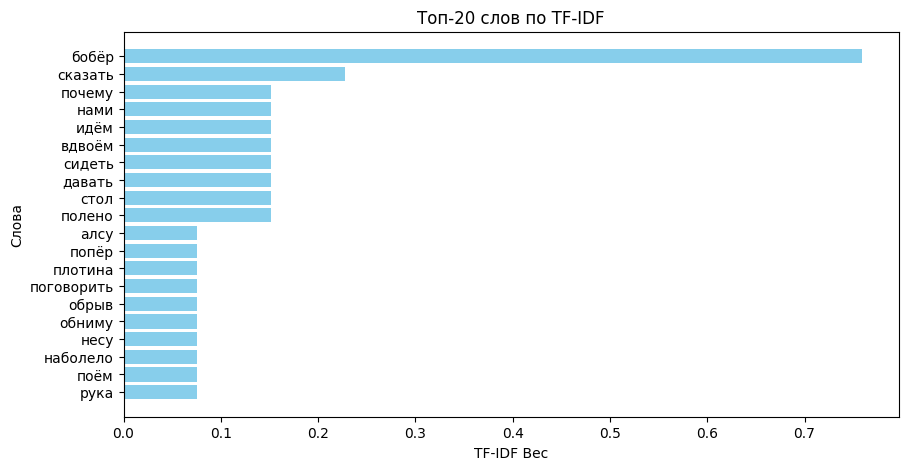

In [17]:
import matplotlib.pyplot as plt

# Выбираем топ-20 слов с наибольшим TF-IDF
df_top = df.head(20)

plt.figure(figsize=(10, 5))
plt.barh(df_top.index, df_top["TF-IDF"], color='skyblue')
plt.xlabel("TF-IDF Вес")
plt.ylabel("Слова")
plt.title("Топ-20 слов по TF-IDF")
plt.gca().invert_yaxis()  # Инвертируем ось, чтобы самое важное слово было сверху
plt.show()


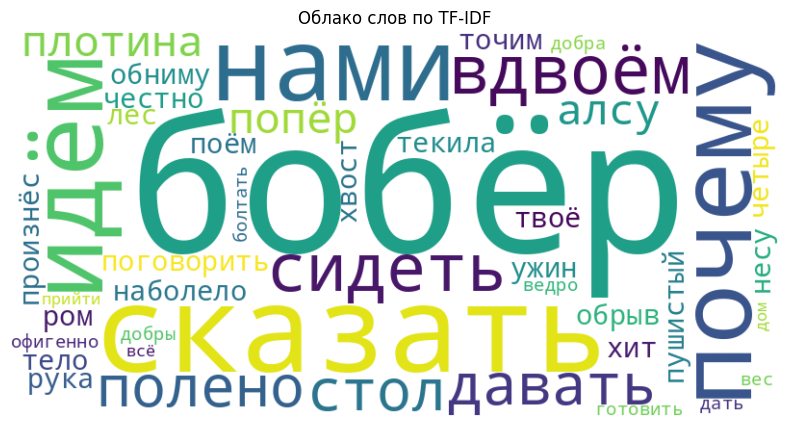

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(df["TF-IDF"].to_dict())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов по TF-IDF")
plt.show()


In [19]:
df_all = pd.DataFrame(tfIdf.T.todense(), index=tfIdfVectorizer.get_feature_names_out())
df_all.columns = [f"Песня {i+1}" for i in range(len(cleaned_songs))]
print(df_all.head(10))  # Посмотрим первые 10 слов


                   Песня 1   Песня 2   Песня 3
алсу              0.075868  0.000000  0.000000
байбабабабабабай  0.000000  0.106174  0.000000
бобёр             0.758676  0.000000  0.000000
болтать           0.075868  0.000000  0.000000
больший           0.000000  0.106174  0.000000
большой           0.000000  0.000000  0.056073
вдвоём            0.151735  0.000000  0.000000
ведро             0.075868  0.000000  0.000000
верху             0.000000  0.053087  0.000000
вес               0.075868  0.000000  0.000000


### word2vec


In [20]:
data = []
for song in cleaned_songs:
    data.append(song.split())

flat_list = [x for xs in data for x in xs]

In [21]:
from gensim.models import Word2Vec

In [22]:
w2v_model = Word2Vec(
    min_count=1, # сколько раз должно встретиться слово, чтобы мы принимали его во внимание
    # поскольку у нас очень мало слов, мы не можем себе позволить ставить это значение больше единицы
    vector_size=300, # размер word embedding
    window=2, # размер окна контекста
    negative=5, # значение для negative sampling
    alpha=0.03, # начальный learning rate
    min_alpha=0.0007, # минимальный learning rate
    sample=6e-5,
    sg=1) # используем skip-граммы вместо CBOW

In [23]:
w2v_model.build_vocab(data)

In [26]:
start_time = time.time()
w2v_model.train(data, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
end_time = time.time()
print(f"word2vec: {end_time - start_time} seconds")

word2vec: 0.03974294662475586 seconds


In [27]:
w2v_model.wv.vectors.shape[0]

125

In [28]:
w2v_model.wv.most_similar(positive=["бобёр"])

[('мешать', 0.21813112497329712),
 ('второй', 0.2173912078142166),
 ('всё', 0.20635274052619934),
 ('спать', 0.19957032799720764),
 ('замечать', 0.1965447962284088),
 ('сильный', 0.18997865915298462),
 ('план', 0.18955422937870026),
 ('офигенно', 0.18863970041275024),
 ('отправляться', 0.18005023896694183),
 ('ночь', 0.17874595522880554)]

In [29]:
w2v_model.wv.get_vector("бобёр").shape

(300,)

In [30]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [31]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:

        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    matrix = np.array(tokens)
    new_values = tsne_model.fit_transform(matrix)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(20, 20))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


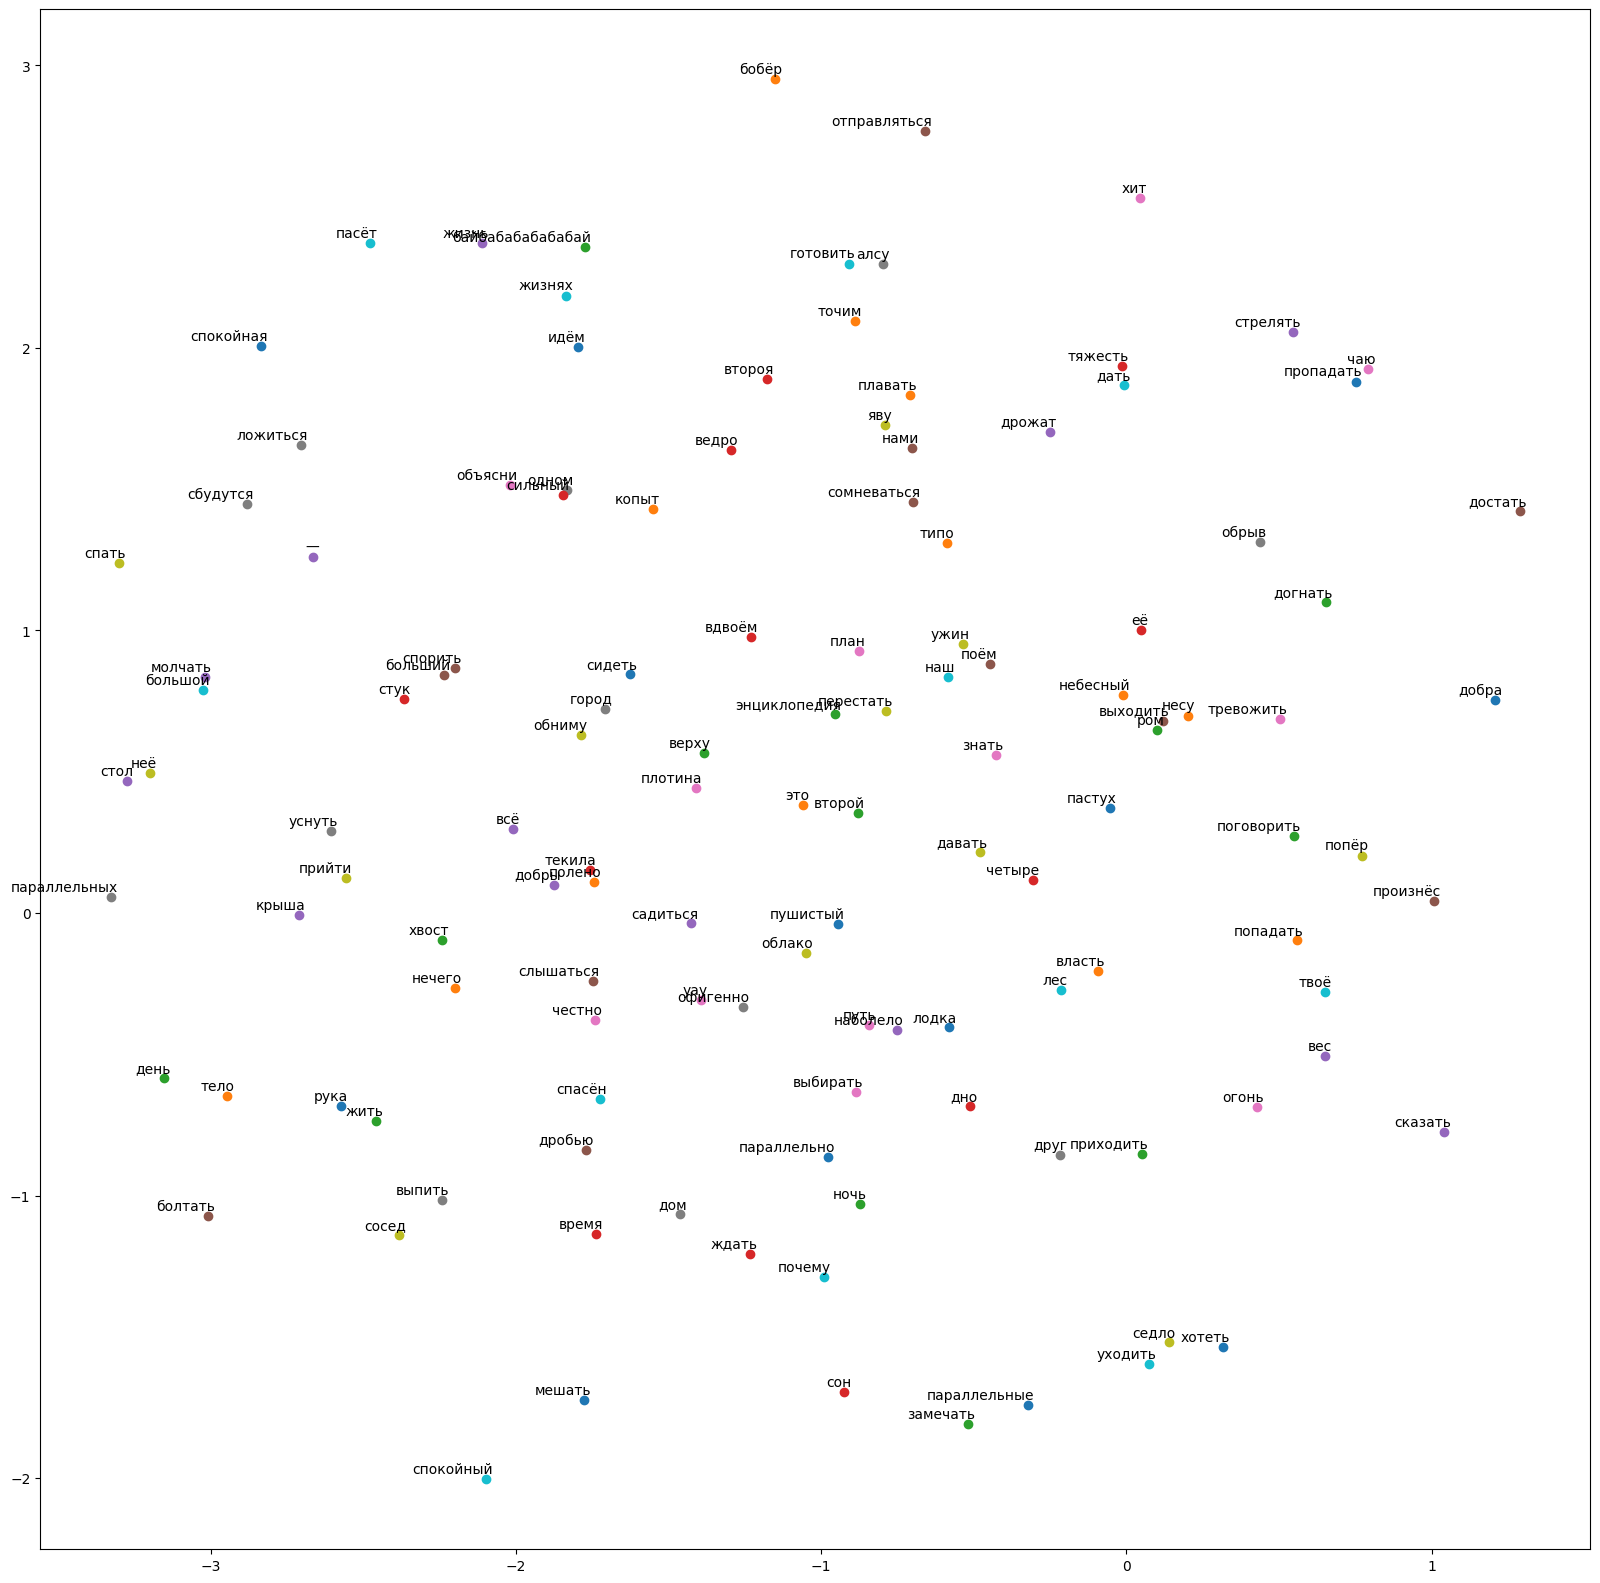

In [33]:
tsne_plot(w2v_model)

исследование результатов

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
full_text = ''
for song in cleaned_songs:
    full_text = full_text + song + ' '

In [36]:
full_text = ''
for song in cleaned_songs:
    full_text = full_text + song + ' '
from collections import Counter
tokens = full_text.split(" ")
word_counts = Counter(tokens)
word_counts["бобёр"]

10

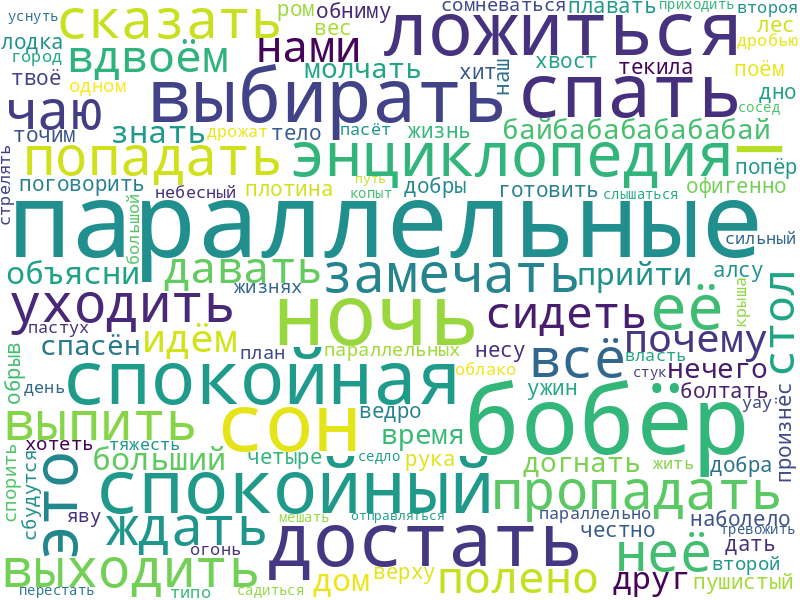

In [37]:
cloud = WordCloud(width=800, height=600, background_color = '#FFFFFF')
cloud.generate_from_frequencies(word_counts)
cloud.to_image()

CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

start_time = time.time()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_songs)

end_time = time.time()
print(f"CountVectorizer time: {end_time - start_time} seconds")

CountVectorizer time: 0.003398895263671875 seconds


In [43]:
import pandas as pd

df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df1)

   алсу  байбабабабабабай  бобёр  болтать  больший  большой  вдвоём  ведро  \
0     1                 0     10        1        0        0       2      1   
1     0                 2      0        0        2        0       0      0   
2     0                 0      0        0        0        1       0      0   

   верху  вес  ...  уходить  хвост  хит  хотеть  чаю  честно  четыре  \
0      0    1  ...        0      1    1       0    0       1       1   
1      1    0  ...        3      0    0       1    3       0       0   
2      0    0  ...        0      0    0       0    0       0       0   

   энциклопедия  это  яву  
0             0    0    0  
1             4    2    1  
2             0    2    0  

[3 rows x 124 columns]


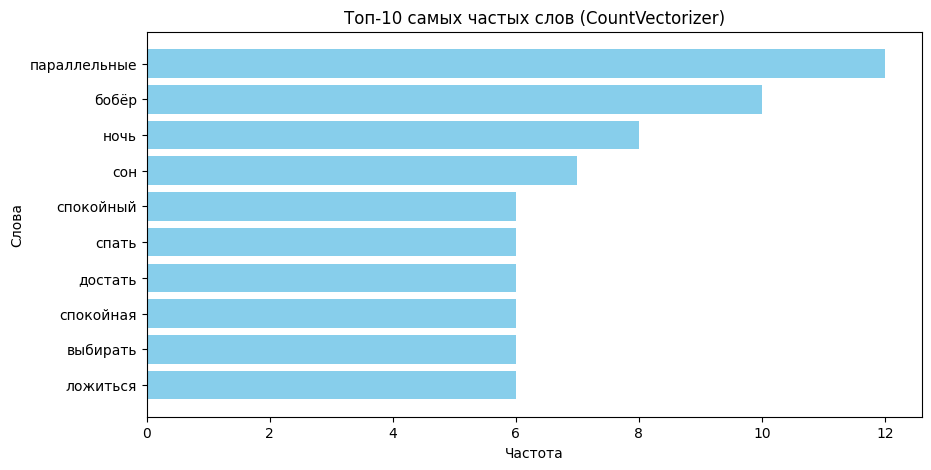

In [44]:
import matplotlib.pyplot as plt

# Суммируем количество появлений каждого слова
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Создаём DataFrame и сортируем по убыванию
df_words = pd.DataFrame({'Слово': words, 'Частота': word_counts}).sort_values(by="Частота", ascending=False)

# Строим гистограмму
plt.figure(figsize=(10, 5))
plt.barh(df_words["Слово"][:10], df_words["Частота"][:10], color="skyblue")
plt.xlabel("Частота")
plt.ylabel("Слова")
plt.title("Топ-10 самых частых слов (CountVectorizer)")
plt.gca().invert_yaxis()
plt.show()

## **Часть 2**

In [10]:
import csv
import pandas as pd

In [11]:
df = pd.read_csv("IMDB Dataset.csv", sep=';', encoding='utf-8', on_bad_lines='skip', quoting=csv.QUOTE_NONE)
df

,"review,sentiment"
0,"""One of the other reviewers has mentioned that..."
1,"""A wonderful little production. <br /><br />Th..."
2,"""I thought this was a wonderful way to spend t..."
3,"""Basically there's a family where a little boy..."
4,"""Petter Mattei's """"Love in the Time of Money""""..."
...,...
42758,"""I thought this movie did a down right good jo..."
42759,"""Bad plot, bad dialogue, bad acting, idiotic d..."
42760,"""I am a Catholic taught in parochial elementar..."
42761,"""I'm going to have to disagree with the previo..."


In [12]:
with open("IMDB Dataset.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()
    print(lines[:10])  # Выведем первые 10 строк для анализа разделителей


['review,sentiment\n', '"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

In [13]:
import pandas as pd
import csv

df = pd.read_csv("IMDB Dataset.csv", sep=',', encoding='utf-8', quoting=csv.QUOTE_MINIMAL, on_bad_lines='skip')

print(df.head())

# удаляем HTML-теги из отзыва

import re

df['review'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [14]:
!pip install huggingface_hub

In [15]:
from transformers import BertTokenizer, DistilBertTokenizer

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [17]:
tokens = tokenizer.tokenize(df['review'][0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Sentence: {df["review"][0]}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other

In [18]:
df['review'][27000]

'Dreamland started out moderately interesting but never went anywhere except Tedium city. A low rent affair with no name actors and laughable effects, not recommended for any reason. The best thing that could be said is it looks like they really filmed it on location in the Nevada desert. That\'s it, I can\'t think of one thing good besides that about this stinker. The finale is supposed to be some kind of revelation but falls flat like the rest. Oh, I thought of one other good point about this cheese, it clocks in at just over an hour although it still wears out its welcome long before then. When the girl starts walking around in the desert at night it seems to last forever and just keeps getting worse from there. The attempts at horror aren\'t effective in the least. The story is an attempt at a twilight zone style feel but fails badly. Check out "Retroactive" for a good science fiction B-movie.'

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Загружаем стоп-слова из NLTK
stopwords_set = set(stopwords.words('english'))  # Используем множество для быстрого поиска

punctuation = '!?.)"#(;*,\][:'

def text_preprocessing(text, to_list=False):
    text = text.lower()
    text = re.sub(r"'ve", '', text)
    text = re.sub(r"'s", '', text)
    text = re.sub(r"'m", '', text)
    text = re.sub(r"'d", '', text)
    text = re.sub(r"'re", '', text)
    text = re.sub(r"'ll", '', text)
    text = re.sub(r"<br />", ' ', text)
    text = re.sub(r"--", ' ', text)
    text = re.sub(r"' ", ' ', text)
    text = re.sub(r" '", ' ', text)
    text = re.sub(r"- ", ' ', text)

    # Убираем знаки препинания
    for char in text:
        if char in punctuation:
            text = text.replace(char, ' ')

    # Разделяем текст по пробелам, слэшам или дефисам
    text = re.split(' |/|-', text)

    lemlist = []
    for word in text:
        if word not in stopwords_set:  # Проверяем, не является ли слово стоп-словом
            lemlist.append(lemmatizer.lemmatize(word))

    # Убираем пустые элементы
    clean_txt = list(filter(None, lemlist))

    if to_list:
        return clean_txt
    else:
        return ' '.join(clean_txt)

processed_text = text_preprocessing(df['review'][27000])  # смотрим как отрабатывает функция на отдельной ячейке с ревью
print(processed_text)

dreamland started moderately interesting never went anywhere except tedium city low rent affair name actor laughable effect recommended reason best thing could said look like really filmed location nevada desert can't think one thing good besides stinker finale supposed kind revelation fall flat like rest oh thought one good point cheese clock hour although still wear welcome long girl start walking around desert night seems last forever keep getting worse attempt horror effective least story attempt twilight zone style feel fails badly check retroactive good science fiction b movie


In [36]:
%%time
df_processed = df.review.apply(text_preprocessing)  #применяем функцию ко всему датафрейму

CPU times: user 31.1 s, sys: 77.3 ms, total: 31.2 s
Wall time: 31.1 s


In [37]:
df_processed[12001]  #смотрим рандомную ячейку

'waste time tried sit ky captain 6 time every time within 3 minute start something else anything else downright boring movie acting terrible writing dull obviously first time director stiff wanted love love sci fi old cliffhanger appreciate attempt nod flash gordon metropolis god waste money used work paramount picture written sherry lansing 1993 using blue screen screen test told never interest need 10 year later paramount release piece crap sherry right 1993 must forgotten advice greenlighted dog blue screen effect shot entire movie let forget neither jude jolie terrific actor easy eye paltrow performance reminds high school effort bad could worked skilled director funny thing sky captain director keep getting work even dreck commerce art'

In [25]:
tokens = tokenizer.tokenize(df_processed[0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Sentence: {df_processed[0]}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience wa

In [ ]:
!pip install torch

In [27]:
import torch
encoding = tokenizer.encode_plus(
  df_processed[0],
  max_length=32,
  truncation = True,
  add_special_tokens=True,
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',
)

print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,  2028, 12027,  3855,  3666,  1015, 11472,  2792, 13322,  2157,
         3599,  3047,  2034,  2518,  4930, 11472, 24083,  4895, 10258,  2378,
         8450,  3496,  4808,  2275,  2157,  2773,  2175,  3404,  2265,  8143,
        18627,   102])

In [38]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
!pip install datasets

In [30]:
import datasets
from torch.utils.data import Dataset

In [39]:
final_df = pd.concat([df_processed, df['sentiment']], axis=1)
final_df.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [40]:
final_df = final_df.rename(columns={'review':'processed_review'})

In [41]:
final_df = pd.concat([df['review'], final_df], axis=1)

In [42]:
final_df

,review,processed_review,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...,positive
1,A wonderful little production. The filming tec...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,thought movie right good job creative original...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,catholic taught parochial elementary school nu...,negative
49998,I'm going to have to disagree with the previou...,going disagree previous comment side maltin on...,negative


In [104]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Разделяем данные на обучающую и временную валидационную выборку
train_set, temp_valid_set, train_labels, temp_valid_labels = train_test_split(
    final_df[['processed_review', 'review']],
    final_df['sentiment'],
    stratify=final_df['sentiment'],
    test_size=0.3,
    random_state=0
)

# Формируем DataFrame для обучающей выборки
df_train = pd.DataFrame({
    'review': train_set['processed_review'].values,
    'review_old': train_set['review'].values,
    'sentiment': train_labels.values
})

# Разделяем временную валидационную выборку пополам, чтобы получить финальные валидационные и тестовые данные
valid_set, test_set, valid_labels, test_labels = train_test_split(
    temp_valid_set[['processed_review', 'review']],
    temp_valid_labels,
    stratify=temp_valid_labels,
    test_size=0.5,
    random_state=0
)

# Создаем DataFrame для валидационного набора
df_valid = pd.DataFrame({
    'review': valid_set['processed_review'].values,
    'review_old': valid_set['review'].values,
    'sentiment': valid_labels.values
})

# Создаем DataFrame для тестового набора
df_test = pd.DataFrame({
    'review': test_set['processed_review'].values,
    'review_old': test_set['review'].values,
    'sentiment': test_labels.values
})

(35000, 3) (7500, 3) (7500, 3)


In [44]:
print(final_df['sentiment'].unique())

['positive' 'negative']


In [45]:
final_df['sentiment'] = final_df['sentiment'].map({'negative': 0, 'positive': 1})

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            50000 non-null  object
 1   processed_review  50000 non-null  object
 2   sentiment         50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [53]:
x = final_df['processed_review']
y = final_df['sentiment']

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=42)

In [56]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_NAME = "bert-base-uncased"  # Используем стандартный BERT
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)  # Два класса: 0 и 1

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
## создаем класс IMDBDataset для обработки датасета и деления его на батчи

class IMDBDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.texts = texts.tolist()  # Преобразуем в список
        self.labels = labels.tolist()  # Тоже в список
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)  # Количество примеров

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Берём текст по индексу
        label = self.labels[idx]  # Берём соответствующую метку

        encoding = self.tokenizer(
            text,
            truncation=True,  # Обрезаем длинные тексты
            padding='max_length',  # Добавляем паддинг до max_len
            max_length=self.max_len,
            return_tensors="pt"  # Преобразуем в тензор PyTorch
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),  # ID токенов
            "attention_mask": encoding["attention_mask"].squeeze(0),  # Маска внимания
            "labels": torch.tensor(label, dtype=torch.long),  # Метка класса
        }

In [61]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataset = IMDBDataset(x_train, y_train, tokenizer)
test_dataset = IMDBDataset(x_test, y_test, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=16, sampler=RandomSampler(train_dataset))
test_dataloader = DataLoader(test_dataset, batch_size=16, sampler=SequentialSampler(test_dataset))

In [62]:
from transformers import AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
loss_fn = torch.nn.CrossEntropyLoss()

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [63]:
from transformers import get_scheduler

EPOCHS = 3
num_training_steps = len(train_dataloader) * EPOCHS
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}")

Epoch 1/3, Loss: 0.2857
Epoch 2/3, Loss: 0.1493
Epoch 3/3, Loss: 0.0649


In [64]:
from sklearn.metrics import accuracy_score

model.eval()
all_predictions, all_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=-1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())

accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9185
